<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Прогноз истощения абсорбента NaOH в абсорбере (промышленная аналитика)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
opers = pd.read_csv('datasets/opers.csv', encoding='cp1251')
samples = pd.read_csv('datasets/samples.csv', encoding='cp1251')

In [3]:
opers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   equip   3186 non-null   object 
 1   start   3186 non-null   object 
 2   end     3186 non-null   object 
 3   qty     3091 non-null   float64
dtypes: float64(1), object(3)
memory usage: 99.7+ KB


In [4]:
opers.head()

,equip,start,end,qty
0,РТ 760 №5,2023-10-05 18:27:31.906949,2023-10-06 00:06:39.653162,521.289881
1,РТ 760 №5,2023-12-28 21:25:19.315011,2023-12-29 03:21:18.385716,464.082365
2,РТ 760 №1,2023-07-05 19:14:05.579898,2023-07-06 00:58:24.087742,502.572602
3,РТ 760 №3,2023-01-25 00:51:37.813225,2023-01-25 06:51:10.620608,548.499959
4,РТ 760 №3,2023-03-24 12:28:53.646291,2023-03-24 19:09:02.971808,495.058818


In [5]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   equip     1048 non-null   object 
 1   datetime  1048 non-null   object 
 2   NaOH      1004 non-null   float64
dtypes: float64(1), object(2)
memory usage: 24.7+ KB


In [6]:
samples.head()

,equip,datetime,NaOH
0,РТ 760 №2,2023-02-03 16:00:00,238.026167
1,РТ 760 №2,2023-07-23 16:00:00,537.701365
2,РТ 760 №6,2023-02-08 16:00:00,569.706176
3,РТ 760 №6,2023-01-07 16:00:00,563.451583
4,РТ 760 №4,2023-07-22 16:00:00,10.798580


In [7]:
opers['start'] = pd.to_datetime(opers['start'])
opers['end'] = pd.to_datetime(opers['end'])
samples['datetime'] = pd.to_datetime(samples['datetime'])

In [8]:
clear_opers = opers[opers['equip'] == 'РТ 760 №1']
clear_opers = clear_opers.dropna()
clear_opers = clear_opers.drop_duplicates()
clear_opers = clear_opers.sort_values('start').reset_index(drop=True)
clear_opers

,equip,start,end,qty
0,РТ 760 №1,2023-01-01 02:49:24.066015,2023-01-01 09:20:46.783337,451.523871
1,РТ 760 №1,2023-01-01 12:06:55.344726,2023-01-01 17:11:09.691310,500.595561
2,РТ 760 №1,2023-01-01 20:04:29.761313,2023-01-02 01:05:27.158729,485.037107
3,РТ 760 №1,2023-01-02 03:41:14.156567,2023-01-02 10:30:23.620465,504.061134
4,РТ 760 №1,2023-01-02 13:28:33.391611,2023-01-02 20:21:11.679882,467.669823
...,...,...,...,...
982,РТ 760 №1,2023-12-30 08:08:55.359257,2023-12-30 13:34:18.596998,506.738412
983,РТ 760 №1,2023-12-30 15:44:15.075279,2023-12-30 10:58:14.782114,513.597994
984,РТ 760 №1,2023-12-31 00:24:13.514052,2023-12-31 06:59:41.544150,518.957463
985,РТ 760 №1,2023-12-31 09:31:09.530174,2023-12-31 14:34:36.314100,494.300119


In [9]:
clear_samples = samples[samples['equip'] == 'РТ 760 №2']
clear_samples = clear_samples.dropna()
clear_samples = clear_samples.drop_duplicates()
clear_samples = clear_samples.sort_values('datetime').reset_index(drop=True)
clear_samples

,equip,datetime,NaOH
0,РТ 760 №2,2023-01-01 16:00:00,565.530270
1,РТ 760 №2,2023-01-02 16:00:00,409.572045
2,РТ 760 №2,2023-01-03 16:00:00,267.191749
3,РТ 760 №2,2023-01-04 16:00:00,132.798012
4,РТ 760 №2,2023-01-05 16:00:00,8.271607
...,...,...,...
327,РТ 760 №2,2023-12-27 16:00:00,440.680827
328,РТ 760 №2,2023-12-28 16:00:00,271.943054
329,РТ 760 №2,2023-12-29 16:00:00,114.801612
330,РТ 760 №2,2023-12-30 16:00:00,8.271607


In [10]:
clear_opers['duration'] = clear_opers['end'] - clear_opers['start']
clear_opers

,equip,start,end,qty,duration
0,РТ 760 №1,2023-01-01 02:49:24.066015,2023-01-01 09:20:46.783337,451.523871,0 days 06:31:22.717322
1,РТ 760 №1,2023-01-01 12:06:55.344726,2023-01-01 17:11:09.691310,500.595561,0 days 05:04:14.346584
2,РТ 760 №1,2023-01-01 20:04:29.761313,2023-01-02 01:05:27.158729,485.037107,0 days 05:00:57.397416
3,РТ 760 №1,2023-01-02 03:41:14.156567,2023-01-02 10:30:23.620465,504.061134,0 days 06:49:09.463898
4,РТ 760 №1,2023-01-02 13:28:33.391611,2023-01-02 20:21:11.679882,467.669823,0 days 06:52:38.288271
...,...,...,...,...,...
982,РТ 760 №1,2023-12-30 08:08:55.359257,2023-12-30 13:34:18.596998,506.738412,0 days 05:25:23.237741
983,РТ 760 №1,2023-12-30 15:44:15.075279,2023-12-30 10:58:14.782114,513.597994,-1 days +19:13:59.706835
984,РТ 760 №1,2023-12-31 00:24:13.514052,2023-12-31 06:59:41.544150,518.957463,0 days 06:35:28.030098
985,РТ 760 №1,2023-12-31 09:31:09.530174,2023-12-31 14:34:36.314100,494.300119,0 days 05:03:26.783926


In [11]:
clear_opers['duration'].describe()

count                          987
mean     0 days 05:25:49.157227633
std      0 days 02:52:17.442786083
min       -1 days +03:36:33.443129
25%         0 days 05:27:01.584387
50%         0 days 06:01:47.285552
75%      0 days 06:30:24.662846500
max         0 days 06:59:57.841803
Name: duration, dtype: object

In [12]:
clear_opers = clear_opers[clear_opers['duration'] > pd.Timedelta(seconds=0)]
clear_opers = clear_opers.reset_index(drop=True)
clear_opers['duration'].describe()

count                          940
mean     0 days 06:02:15.213172573
std      0 days 00:35:01.747656026
min         0 days 05:00:03.793489
25%         0 days 05:31:26.774559
50%         0 days 06:04:33.721060
75%      0 days 06:31:32.864936500
max         0 days 06:59:57.841803
Name: duration, dtype: object

In [13]:
clear_samples['delta'] = clear_samples['NaOH'].shift() - clear_samples['NaOH']
clear_samples

,equip,datetime,NaOH,delta
0,РТ 760 №2,2023-01-01 16:00:00,565.530270,NaN
1,РТ 760 №2,2023-01-02 16:00:00,409.572045,155.958224
2,РТ 760 №2,2023-01-03 16:00:00,267.191749,142.380296
3,РТ 760 №2,2023-01-04 16:00:00,132.798012,134.393737
4,РТ 760 №2,2023-01-05 16:00:00,8.271607,124.526406
...,...,...,...,...
327,РТ 760 №2,2023-12-27 16:00:00,440.680827,103.020755
328,РТ 760 №2,2023-12-28 16:00:00,271.943054,168.737773
329,РТ 760 №2,2023-12-29 16:00:00,114.801612,157.141442
330,РТ 760 №2,2023-12-30 16:00:00,8.271607,106.530005


In [14]:
# for index in range(1, len(clear_samples)):
#     time_df = clear_opers[(clear_opers['start'] > clear_samples.at[index-1, 'datetime']) &
#                           (clear_opers['start'] < clear_samples.at[index, 'datetime'])]
#     print(time_df)
#     clear_samples.at[index, 'duration'] = time_df['duration'].dt.total_seconds().sum() / 3600

In [15]:
#time_df['duration'].dt.total_seconds().sum() / 3600

In [16]:
clear_samples['duration'] = 0.0
for index in range(1, len(clear_samples)):
    time_df = clear_opers[(clear_opers['start'] > clear_samples.at[index-1, 'datetime']) &
                          (clear_opers['start'] < clear_samples.at[index, 'datetime'])]
    clear_samples.at[index, 'duration'] = time_df['duration'].dt.total_seconds().sum() / 3600
    
clear_samples

,equip,datetime,NaOH,delta,duration
0,РТ 760 №2,2023-01-01 16:00:00,565.530270,NaN,0.000000
1,РТ 760 №2,2023-01-02 16:00:00,409.572045,155.958224,18.712542
2,РТ 760 №2,2023-01-03 16:00:00,267.191749,142.380296,17.086949
3,РТ 760 №2,2023-01-04 16:00:00,132.798012,134.393737,16.152106
4,РТ 760 №2,2023-01-05 16:00:00,8.271607,124.526406,19.747398
...,...,...,...,...,...
327,РТ 760 №2,2023-12-27 16:00:00,440.680827,103.020755,12.394012
328,РТ 760 №2,2023-12-28 16:00:00,271.943054,168.737773,20.251019
329,РТ 760 №2,2023-12-29 16:00:00,114.801612,157.141442,18.911132
330,РТ 760 №2,2023-12-30 16:00:00,8.271607,106.530005,12.018282


In [17]:
clear_samples = clear_samples[(clear_samples['delta'] > 0) | (clear_samples['delta'].isna())].reset_index(drop=True)
clear_samples

,equip,datetime,NaOH,delta,duration
0,РТ 760 №2,2023-01-01 16:00:00,565.530270,NaN,0.000000
1,РТ 760 №2,2023-01-02 16:00:00,409.572045,155.958224,18.712542
2,РТ 760 №2,2023-01-03 16:00:00,267.191749,142.380296,17.086949
3,РТ 760 №2,2023-01-04 16:00:00,132.798012,134.393737,16.152106
4,РТ 760 №2,2023-01-05 16:00:00,8.271607,124.526406,19.747398
...,...,...,...,...,...
256,РТ 760 №2,2023-12-25 16:00:00,8.271607,106.878053,11.789278
257,РТ 760 №2,2023-12-27 16:00:00,440.680827,103.020755,12.394012
258,РТ 760 №2,2023-12-28 16:00:00,271.943054,168.737773,20.251019
259,РТ 760 №2,2023-12-29 16:00:00,114.801612,157.141442,18.911132


In [18]:
#train, test = train_test_split(clear_samples, shuffle=False, test_size=0.1)

In [19]:
# print(train.index.min(), train.index.max())
# print(test.index.min(), test.index.max())

In [20]:
# features_train = train.drop(['delta', 'equip'], axis=1)
# target_train = train['delta']

# features_test = test.drop(['delta', 'equip'], axis=1)
# target_test = test['delta']

In [21]:
#model_linear = LinearRegression()

In [22]:
#model_linear.fit(features_train, target_train)

In [23]:
x = np.array(clear_samples['duration'][1:]).reshape(-1, 1)
y = np.array(clear_samples['delta'][1:]).reshape(-1, 1)

In [24]:
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('Коэффициент детерминации:', r_sq)

Коэффициент детерминации: 0.5409271490932048


In [25]:
clear_samples.corr()

,NaOH,delta,duration
NaOH,1.000000,0.146122,-0.162916
delta,0.146122,1.000000,0.735477
duration,-0.162916,0.735477,1.000000


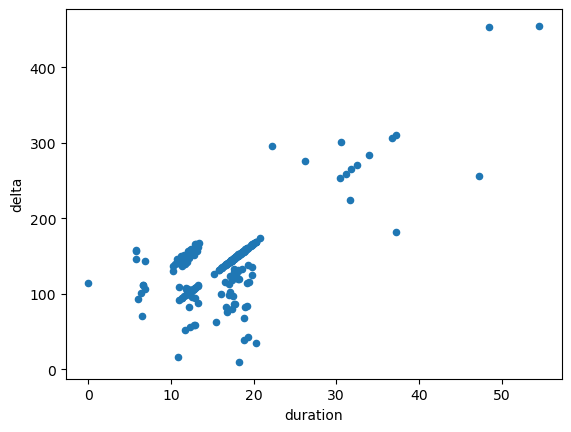

In [26]:
clear_samples.plot.scatter('duration', 'delta');

In [27]:
print('Свободный коэффициент:', model.intercept_)
print('Коэффициент от длительности:', model.coef_)

Свободный коэффициент: [39.73181034]
Коэффициент от длительности: [[6.03793203]]


In [28]:
print('qty:', clear_opers['qty'].median())
print('duration:', clear_opers['duration'].dt.total_seconds().median() / 3600)

qty: 500.1207212559046
duration: 6.076033627777779


In [29]:
def absorber_forecast(NaOH):
    duration = (NaOH - 39.73) / 6.04
    print('Оставшееся время работы абсорбера, ч', duration)
    print('Примерное количество операций:', int(duration / 6.08))
    print('Примерный обрабатываемый объем, л:', duration / 6.08 * 500.12)

In [30]:
absorber_forecast(450)

Оставшееся время работы абсорбера, ч 67.92549668874172
Примерное количество операций: 11
Примерный обрабатываемый объем, л: 5587.318980916695
